In [1]:
import collections
from collections import OrderedDict
from matplotlib import pyplot as plt
from matplotlib import cm
import pylab
import math
import numpy as np
from operator import add
from scipy.stats import pearsonr

In [2]:
class CGR():
    K = 0
    c = None
    h = ""
    Data = ""
    i = 0
    def __init__(self,a):
        self.i=a
    def read_fasta(self,loc):
        f = open(loc)
        s1 = f.read()
        data = "".join(s1.split("\n")[1:])
        head = "".join(s1.split("\n")[0:1])
        return data,head
    
    def count_kmers(self,sequence, k):
        d = collections.defaultdict(int)
        for i in range(len(self.Data)-(k-1)):
            d[sequence[i:i+k]] +=1
        d.pop("N",None)
        return d

    def probabilities(self,kmer_count, k):
        probabilities = collections.defaultdict(float)
        N = len(self.Data)
        for key, value in kmer_count.items():
            probabilities[key] = float(value) / (N - k + 1)
        return probabilities

    def chaos_game_representation(self,probabilities, k):
        array_size = int(math.sqrt(4**k))
        chaos = []
        for i in range(array_size):
            chaos.append([0]*array_size)
        maxx = array_size
        maxy = array_size
        posx = 1
        posy = 1
        for key, value in probabilities.items():
            for char in key:
                if char == "T":
                    posx +=  maxx/2
                elif char == "C":
                    posy += maxy/2
                elif char == "G":
                    posx += maxx/2
                    posy += maxy/2
                maxx /= 2
                maxy /= 2

            chaos[int(posy-1)][int(posx-1)] = value
            maxx = array_size
            maxy = array_size
            posx = 1
            posy = 1
        m = float(np.amax(chaos))
        c = np.array(chaos)/m
        return c

    def load_fasta(self,loc,k):
        data,head = self.read_fasta(loc)
        self.Data = data
        f4 = self.count_kmers(data, k)
        f4_prob = self.probabilities(f4, k)
        chaos_k4 = self.chaos_game_representation(f4_prob, k)
        self.c = chaos_k4
        self.h = head
        return chaos_k4
    
    def show(self):
        pylab.figure(figsize=(12,12))
        pylab.title('CGR of '+str(self.K)+'-mers for '+self.h[2:])
        pylab.imshow(self.c, cmap=cm.gray_r)#,interpolation = "spline36")
        pylab.savefig(str(self.i)+".PNG")
        pylab.show()

In [7]:
B = CGR(1)
cg = B.load_fasta("seq_1.fasta",9)
C = CGR(2)
cg_1 = C.load_fasta("seq_2.fasta",9)

In [8]:
cg

array([[0.66666667, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

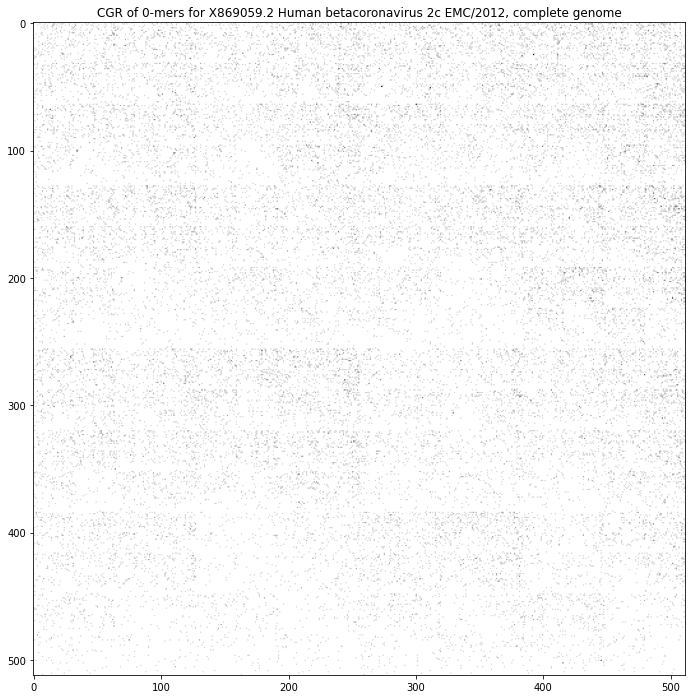

In [9]:
x = B.show()

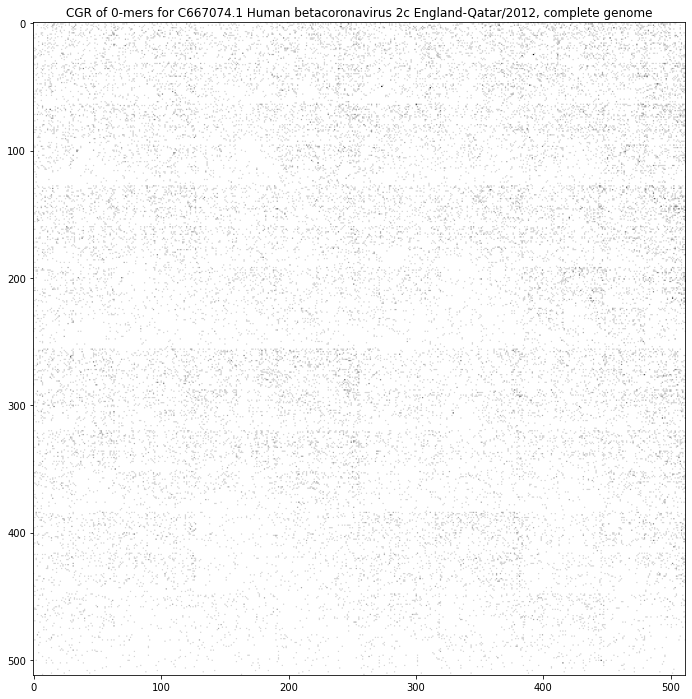

In [10]:
C.show()

In [7]:
np.array(cg).shape

(512, 512)

In [20]:
a = max(cg[0])
b = max(cg[1])
CG = list(map(lambda x,y:((x*(1/a))+(y*(1/b))*10)**0.5, cg[0],cg[1]))
a = max(cg_1[0])
b = max(cg_1[1])
CG_1 = list(map(lambda x,y:((x*(1/a))+(y*(1/b))*10)**0.5, cg_1[0],cg_1[1]))

In [21]:
from scipy.stats import spearmanr
corr, _ = spearmanr(CG,CG_1)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.961


In [12]:
f = open("seq_1.fasta")
s1 = f.read()
data_1 = "".join(s1.split("\n")[1:])
f = open("seq_2.fasta")
s1 = f.read()
data_2 = "".join(s1.split("\n")[1:])

In [13]:
sum=0
for i in range(len(data_2)):
    if data_1[i]==data_2[i]:
        sum+=1
sum/=len(data_1)
print(sum)

0.9877817988645041


In [3]:
import cv2
from skimage.metrics import structural_similarity as ssim
imageA = cv2.imread("F.PNG")
imageB = cv2.imread("S.PNG")

In [4]:
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
(score,_) = ssim(grayA, grayB, full=True)

In [5]:
score

0.753845482854502

In [6]:
from SSIM_PIL import compare_ssim
from PIL import Image

image1 = Image.open('F.PNG')
image2 = Image.open('S.PNG')
value = compare_ssim(image1, image2)
print(value)

0.8196073520889868


In [ ]:
pip install cgr-view

In [ ]:
pip install jellyfish

In [19]:
import cgr

In [29]:
cgr.run_jellyfish("seq_1.fasta",8, "11mer.jf")
cgr2 = cgr.cgr_matrix("11mer.jf")

In [25]:
c = cgr.from_fasta("seq_1.fasta", k = 9, as_single = True)

In [28]:
print(c)

None


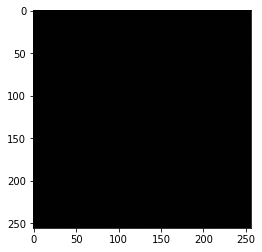

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/cgr/__init__.py:453: UserWarning: cgr.png is a low contrast image
  skimage.io.imsave(out, rgb)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [30]:
cgr.draw_cgr(cgr2, h = 0.64, v = 1.0, resize = True)

In [7]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [8]:
val = PSNR(grayA,grayB)

In [9]:
print(val)

29.793788276869822


In [6]:
u, s, vh = np.linalg.svd(cg, full_matrices=True)

In [8]:
u.shape

(512, 512)

In [13]:
vh.shape

(512, 512)

In [12]:
s.astype(int)

array([12,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [14]:
from scipy import linalg
U, s, Vh = linalg.svd(cg)

In [15]:
U.shape

(512, 512)

In [20]:
s

array([1.20037563e+01, 3.07443297e+00, 3.04890536e+00, 2.98658943e+00,
       2.96713928e+00, 2.91909603e+00, 2.89949407e+00, 2.84692706e+00,
       2.83040167e+00, 2.80713710e+00, 2.80081177e+00, 2.77729532e+00,
       2.75783130e+00, 2.73768345e+00, 2.71626582e+00, 2.70602254e+00,
       2.66656877e+00, 2.65868475e+00, 2.63479654e+00, 2.62543620e+00,
       2.60529929e+00, 2.58710388e+00, 2.58580525e+00, 2.54867162e+00,
       2.53848547e+00, 2.51628673e+00, 2.51550411e+00, 2.49508612e+00,
       2.47770041e+00, 2.46589216e+00, 2.45115062e+00, 2.44066540e+00,
       2.42894586e+00, 2.41876810e+00, 2.40342042e+00, 2.38695182e+00,
       2.37971011e+00, 2.37462891e+00, 2.36497710e+00, 2.33842902e+00,
       2.33657045e+00, 2.32683068e+00, 2.32034255e+00, 2.30461391e+00,
       2.28902225e+00, 2.28180753e+00, 2.27253204e+00, 2.26676594e+00,
       2.25347737e+00, 2.24397503e+00, 2.22568825e+00, 2.21914651e+00,
       2.20579574e+00, 2.19017984e+00, 2.18467687e+00, 2.17666826e+00,
      

In [14]:
val_1=np.zeros(cg.shape[1])
for i in cg:
    a = max(i)
    x = i*(1/a)
    val_1 += x
val_1 = val_1**0.5

In [17]:
val_2=np.zeros(cg.shape[1])
for i in cg_1:
    a = max(i)
    x = i*(1/a)
    val_2 += x
val_2 = val_2**0.5

In [18]:
from scipy.stats import spearmanr
corr, _ = spearmanr(val_1,val_2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.993
